In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
path = '/Users/meganmason491/Documents/research/sierra/data/stations/*.csv'
flist = glob.glob(path)
# flist = flist[:2]
# print(flist)
flist

['/Users/meganmason491/Documents/research/sierra/data/stations/DAN_SD_20121001_to_20180930.csv',
 '/Users/meganmason491/Documents/research/sierra/data/stations/SLI_SD_20121001_to_20180930.csv',
 '/Users/meganmason491/Documents/research/sierra/data/stations/TUM_SD_20121001_to_20180930.csv']

Index(['DAN', 'SLI', 'TUM'], dtype='object')


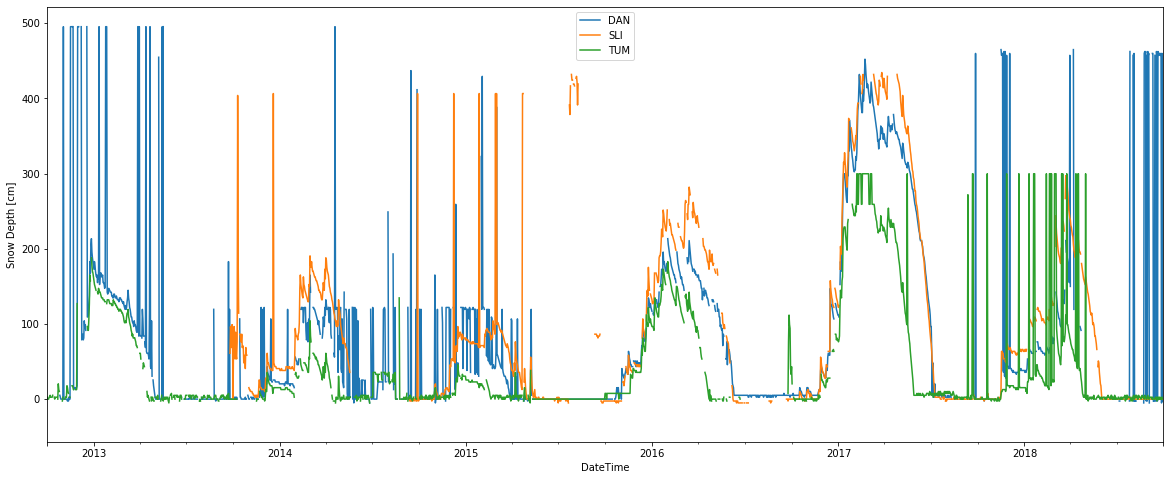

In [197]:
# merge snow depth [in] CSVs

# load single df, first in flist
df = pd.read_csv(flist[0], header=0, usecols=[0,1], names=['DateTime', flist[0].split("/")[-1][:3]])
df['DateTime'] = pd.to_datetime(df['DateTime']) #datetime dtype
df = df.set_index('DateTime') #set datatime as index

# add columns to df
for f in sorted(flist):
        
    tmp_df = pd.read_csv(f, usecols=[0,1]) # load each csv as a tmp_df
    site_id = f.split("/")[-1][:3] #grab site id name from filename
    df.loc[:,site_id] = tmp_df['SNOW DP INCHES'].values # insert temp_df column into df at location (all rows, new site_id name)
    
df=df.replace('--', np.nan)  #raw data has '--' string to mark no value, replace w/ NANs
df=df.astype(float) #cast as float

df = df * 2.54 # convert raw [inches] to [cm] of snow
#note - data have a few negatives (-1,-2), but not too large...


#~~~~plot it
# fig = plt.figure(figsize=(20,15)) #NOT ACTUALLY WORKING...size? plt.plot(df) works but loose 'easy' legend lables
df.plot(figsize=(20,8))
plt.ylabel('Snow Depth [cm]')
plt.legend(loc='best')

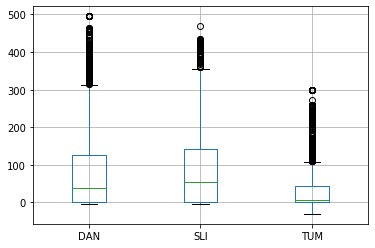

In [183]:
df.boxplot()

In [108]:
boo = pd.DataFrame(np.random.randint(0,5,size=(10, 4)), columns=list('ABCD'))
boo.dtypes
boo

,A,B,C,D
0,2,3,2,3
1,4,1,3,0
2,2,4,4,2
3,0,0,1,1
4,1,4,1,2
5,4,2,2,3
6,0,1,1,2
7,0,1,4,1
8,4,2,3,0
9,4,0,4,1


In [109]:
boo.replace(0, 'bla', inplace=True)
boo

,A,B,C,D
0,2,3,2,3
1,4,1,3,bla
2,2,4,4,2
3,bla,bla,1,1
4,1,4,1,2
5,4,2,2,3
6,bla,1,1,2
7,bla,1,4,1
8,4,2,3,bla
9,4,bla,4,1
